We're going to try to create a model to enter the Dogs vs Cats competition at Kaggle.

##Using Google Colaboratory!!!!!

### Installing Dependencies

In [1]:
!pip3 install fastai==0.7.0

  Using cached https://files.pythonhosted.org/packages/50/6d/9d0d6e17a78b0598d5e8c49a0d03ffc7ff265ae62eca3e2345fab14edb9b/fastai-0.7.0-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/47/87/313cd4ea4f75472826acb74c57f94fc83e04ba93e4ccf35656f6b7f502e2/graphviz-0.9-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/c6/bc/b28b9efb4653c03e597ed207264eea45862b5260f48e9f010b5068d64db1/torchtext-0.3.1-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/7e/9c/c94f46b40b86d2c77c46c4c1b858fc66c117b4390665eca28f2e0812db45/sklearn_pandas-1.7.0-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/c2/d4/fe7e2637975c476734fcbf53776e650a29680194eb0dd21dbdc020ca92de/isoweek-1.3.3-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/a5/62/bbd2be0e7943ec8504b517e62bab011b4946e1258842bc159e5dfde15b96/html5lib-1.0.1-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/5b/

In [2]:
!python -m pip install torchtext==0.2.3

  Found existing installation: torchtext 0.3.1
    Uninstalling torchtext-0.3.1:
      Successfully uninstalled torchtext-0.3.1


### Importing all the libraries needed

In [0]:
# Put these at the top of every notebook, to get automatic reloading and inline plotting
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [0]:
# This file contains all the main external libs we'll use
from fastai.imports import *

In [0]:
from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *

### Accessing the fastai data files

In [6]:
!wget http://files.fast.ai/data/dogscats.zip && unzip -qq dogscats.zip -d data/

--2018-10-15 12:12:37--  http://files.fast.ai/data/dogscats.zip
Resolving files.fast.ai (files.fast.ai)... 67.205.15.147
Connecting to files.fast.ai (files.fast.ai)|67.205.15.147|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 857214334 (818M) [application/zip]
Saving to: ‘dogscats.zip’

dogscats.zip        100%[===================>] 817.50M  42.1MB/s    in 20s     

2018-10-15 12:12:57 (41.2 MB/s) - ‘dogscats.zip’ saved [857214334/857214334]



In [0]:
PATH = "data/dogscats/"
sz=224

## First look at cat pictures

In [8]:
os.listdir(PATH)

['test1', 'valid', 'models', 'train', 'sample']

In [9]:
os.listdir(f'{PATH}valid')

['cats', 'dogs']

In [10]:
files = os.listdir(f'{PATH}valid/cats')[:5]
files

['cat.772.jpg', 'cat.379.jpg', 'cat.5574.jpg', 'cat.7990.jpg', 'cat.10773.jpg']

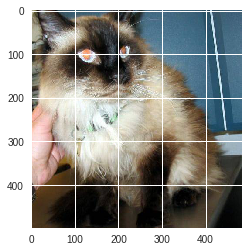

In [11]:
img = plt.imread(f'{PATH}valid/cats/{files[0]}')
plt.imshow(img);

Here is how the raw data looks like

In [12]:
img.shape

(499, 484, 3)

In [13]:
img[:4,:4]

array([[[174, 174, 166],
        [180, 177, 168],
        [178, 176, 161],
        [172, 170, 149]],

       [[173, 173, 165],
        [177, 174, 165],
        [175, 173, 158],
        [172, 170, 149]],

       [[171, 171, 161],
        [174, 172, 160],
        [172, 170, 155],
        [172, 170, 149]],

       [[171, 171, 161],
        [173, 171, 158],
        [171, 170, 152],
        [173, 171, 148]]], dtype=uint8)

### Our first model: quick start

We will be using the <b>resnet34</b> model. resnet34 is a version of the model that won the 2015 ImageNet competition.

In [14]:
arch=resnet34
data = ImageClassifierData.from_paths(PATH, tfms=tfms_from_model(arch, sz))
learn = ConvLearner.pretrained(arch, data, precompute=True)
learn.fit(0.01, 2)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.torch/models/resnet34-333f7ec4.pth
100%|██████████| 87306240/87306240 [00:03<00:00, 27851951.80it/s]


100%|██████████| 32/32 [00:14<00:00,  2.19it/s]


epoch      trn_loss   val_loss   accuracy   
    0      0.051833   0.026613   0.991     
    1      0.041163   0.032004   0.9895    



[array([0.032]), 0.9895]

## Analyzing results: looking at pictures

In [15]:
# This is the label for a val data
data.val_y

array([0, 0, 0, ..., 1, 1, 1])

In [16]:
# from here we know that 'cats' is label 0 and 'dogs' is label 1.
data.classes

['cats', 'dogs']

In [17]:
# this gives prediction for validation set. Predictions are in log scale
log_preds = learn.predict()
log_preds.shape

(2000, 2)

In [18]:
log_preds[:10]

array([[ -0.00006,  -9.7998 ],
       [ -0.00006,  -9.70716],
       [ -0.00092,  -6.99593],
       [ -0.00068,  -7.29783],
       [ -0.0002 ,  -8.5015 ],
       [ -0.00051,  -7.59045],
       [ -0.00024,  -8.33488],
       [ -0.00068,  -7.29411],
       [ -0.00021,  -8.45534],
       [ -0.00001, -11.34464]], dtype=float32)

In [0]:
preds = np.argmax(log_preds, axis=1)  # from log probabilities to 0 or 1
probs = np.exp(log_preds[:,1])        # pr(dog)

In [0]:
def rand_by_mask(mask): return np.random.choice(np.where(mask)[0], min(len(preds), 4), replace=False)
def rand_by_correct(is_correct): return rand_by_mask((preds == data.val_y)==is_correct)

In [0]:
def plots(ims, figsize=(12,6), rows=1, titles=None):
    f = plt.figure(figsize=figsize)
    for i in range(len(ims)):
        sp = f.add_subplot(rows, len(ims)//rows, i+1)
        sp.axis('Off')
        if titles is not None: sp.set_title(titles[i], fontsize=16)
        plt.imshow(ims[i])

In [0]:
def load_img_id(ds, idx): return np.array(PIL.Image.open(PATH+ds.fnames[idx]))

def plot_val_with_title(idxs, title):
    imgs = [load_img_id(data.val_ds,x) for x in idxs]
    title_probs = [probs[x] for x in idxs]
    print(title)
    return plots(imgs, rows=1, titles=title_probs, figsize=(16,8)) if len(imgs)>0 else print('Not Found.')

Correctly classified


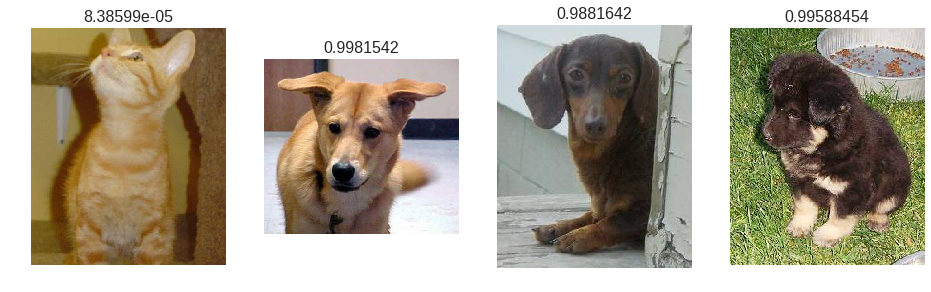

In [23]:
# 1. A few correct labels at random
plot_val_with_title(rand_by_correct(True), "Correctly classified")

Incorrectly classified


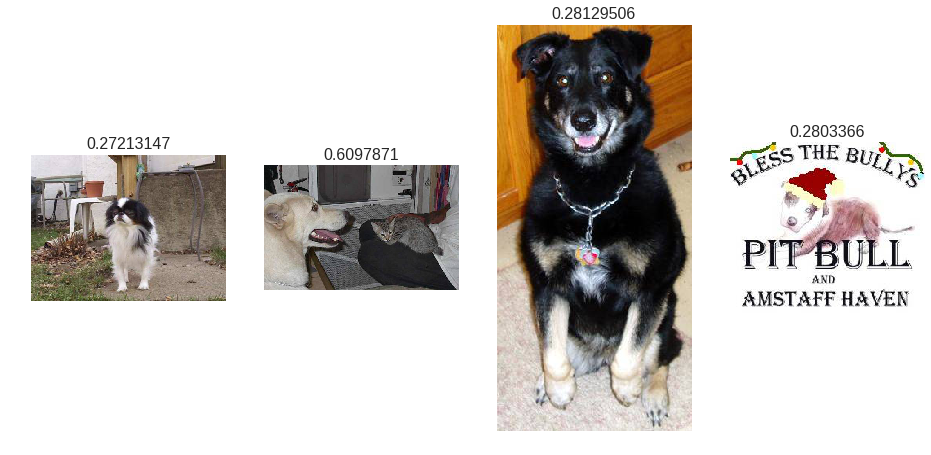

In [24]:
# 2. A few incorrect labels at random
plot_val_with_title(rand_by_correct(False), "Incorrectly classified")

In [0]:
def most_by_mask(mask, mult):
    idxs = np.where(mask)[0]
    return idxs[np.argsort(mult * probs[idxs])[:4]]

def most_by_correct(y, is_correct): 
    mult = -1 if (y==1)==is_correct else 1
    return most_by_mask(((preds == data.val_y)==is_correct) & (data.val_y == y), mult)

Most correct cats


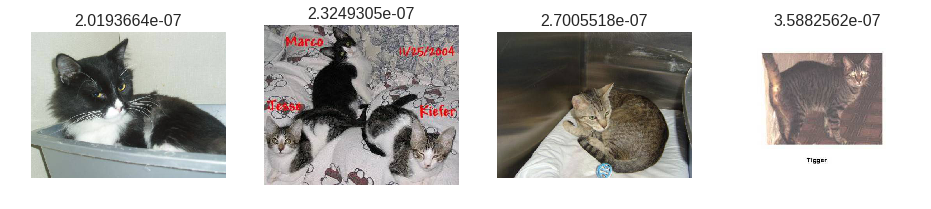

In [26]:
plot_val_with_title(most_by_correct(0, True), "Most correct cats")

Most correct dogs


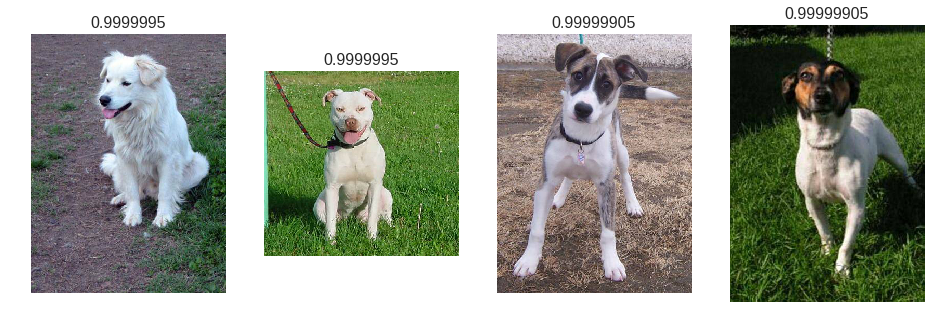

In [27]:
plot_val_with_title(most_by_correct(1, True), "Most correct dogs")

Most incorrect cats


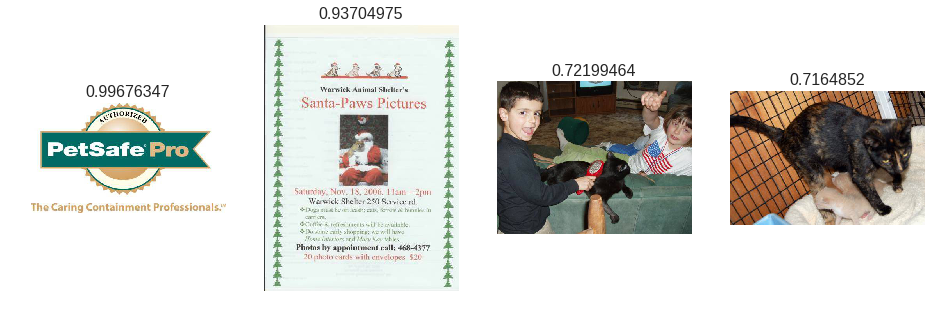

In [28]:
plot_val_with_title(most_by_correct(0, False), "Most incorrect cats")

Most incorrect dogs


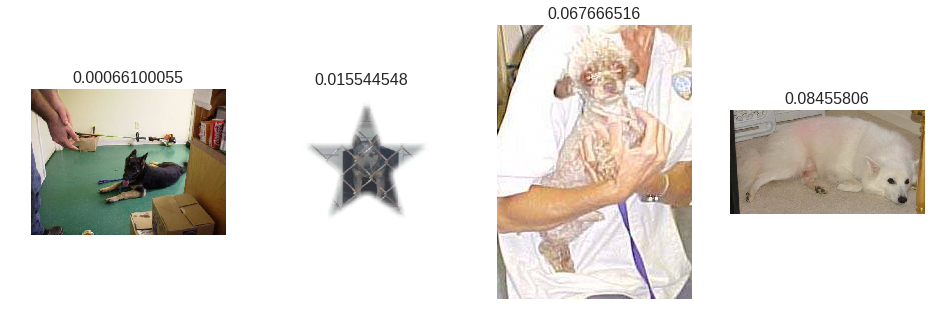

In [29]:
plot_val_with_title(most_by_correct(1, False), "Most incorrect dogs")

Most uncertain predictions


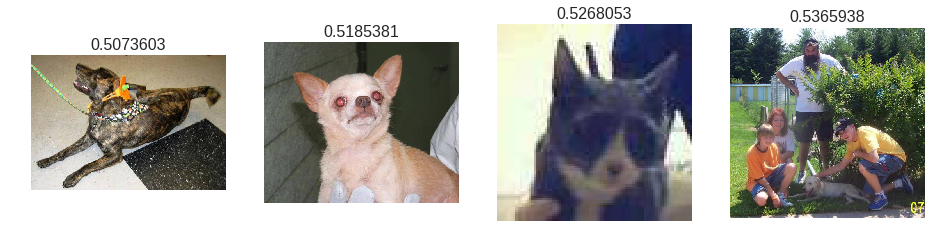

In [30]:
most_uncertain = np.argsort(np.abs(probs -0.5))[:4]
plot_val_with_title(most_uncertain, "Most uncertain predictions")

## Choosing a learning rate

In [0]:
learn = ConvLearner.pretrained(arch, data, precompute=True)

In [32]:
lrf=learn.lr_find()

 83%|████████▎ | 298/360 [00:07<00:01, 48.21it/s, loss=0.454]


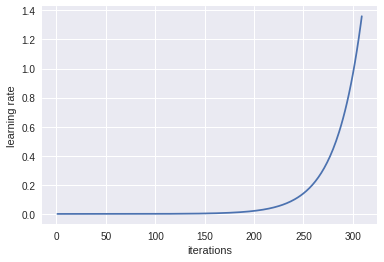

In [33]:
learn.sched.plot_lr()

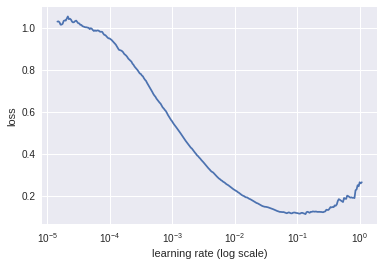

In [35]:
learn.sched.plot()

## Improving our model

### Data augmentation

In [0]:
tfms = tfms_from_model(resnet34, sz, aug_tfms=transforms_side_on, max_zoom=1.1)

In [0]:
def get_augs():
    data = ImageClassifierData.from_paths(PATH, bs=2, tfms=tfms, num_workers=1)
    x,_ = next(iter(data.aug_dl))
    return data.trn_ds.denorm(x)[1]

In [0]:
ims = np.stack([get_augs() for i in range(6)])

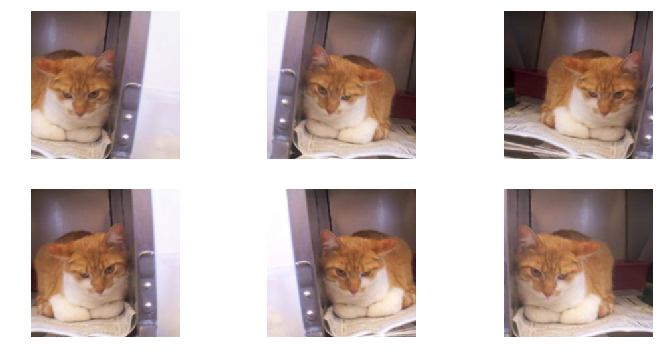

In [39]:
plots(ims, rows=2)

In [0]:
data = ImageClassifierData.from_paths(PATH, tfms=tfms)
learn = ConvLearner.pretrained(arch, data, precompute=True)

In [42]:
learn.fit(1e-2, 1)

epoch      trn_loss   val_loss   accuracy   
    0      0.037406   0.026836   0.989     



[array([0.02684]), 0.989]

In [0]:
learn.precompute=False

In [44]:
learn.fit(1e-2, 3, cycle_len=1)

epoch      trn_loss   val_loss   accuracy   
    0      0.044804   0.02621    0.99      
    1      0.041048   0.026613   0.99      
    2      0.039372   0.029242   0.989     



[array([0.02924]), 0.989]

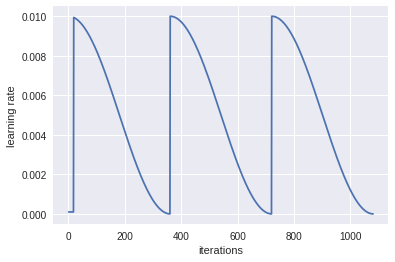

In [45]:
learn.sched.plot_lr()

Our validation loss isn't improving much, so there's probably no point further training the last layer on its own.Hence, saving model.

In [0]:
learn.save('224_lastlayer')

In [0]:
learn.load('224_lastlayer')

### Fine-tuning and differential learning rate annealing

In [0]:
learn.unfreeze()

*1e-4: for first few layers, 1e-3: for middle layers & 1e-2 for layers added on top*

In [0]:
lr=np.array([1e-4,1e-3,1e-2])

In [50]:
learn.fit(lr, 3, cycle_len=1, cycle_mult=2)

epoch      trn_loss   val_loss   accuracy   
    0      0.051841   0.027001   0.9885    
    1      0.03926    0.021275   0.992     
    2      0.029024   0.020982   0.992     
    3      0.040072   0.018675   0.9935    
    4      0.02338    0.019382   0.992     
    5      0.017793   0.018511   0.9925    
    6      0.021445   0.018375   0.9925    



[array([0.01837]), 0.9925]

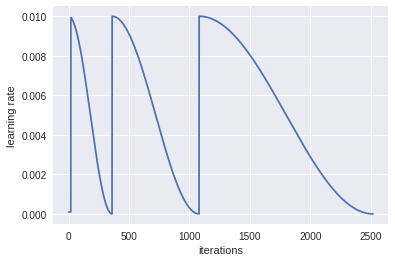

In [51]:
learn.sched.plot_lr()

In [0]:
learn.save('224_all')

In [0]:
learn.load('224_all')

*Test Time Augmentation*

In [55]:
log_preds,y = learn.TTA()
probs = np.mean(np.exp(log_preds),0)

In [56]:
accuracy_np(probs, y)

0.9945

## Analyzing results

### Confusion matrix 

In [0]:
preds = np.argmax(probs, axis=1)
probs = probs[:,1]

In [0]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y, preds)

[[996   4]
 [  7 993]]


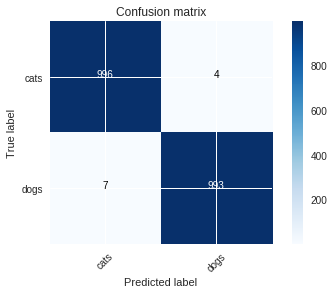

In [59]:
plot_confusion_matrix(cm, data.classes)

### Looking at pictures again

Most incorrect cats


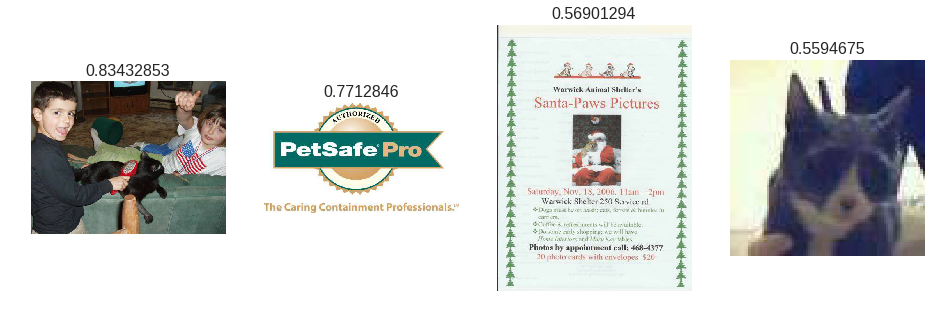

In [60]:
plot_val_with_title(most_by_correct(0, False), "Most incorrect cats")

Most incorrect dogs


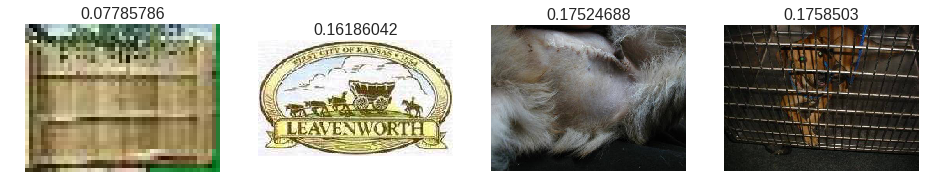

In [61]:
plot_val_with_title(most_by_correct(1, False), "Most incorrect dogs")

## Analyzing results: loss and accuracy

In [0]:
def binary_loss(y, p):
    return np.mean(-(y * np.log(p) + (1-y)*np.log(1-p)))

In [64]:
acts = np.array([1, 0, 0, 1])
preds = np.array([0.9, 0.1, 0.2, 0.8])
binary_loss(acts, preds)

0.164252033486018

Note that in our toy example above our accuracy is 100% and our loss is 0.16.